In [ ]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#creating a dataset
data = {
    'Student_id' : range(1,21),
    'Name' : [f'student_{i}' for i in range(1,21)],
    'Age' : np.random.randint(18, 25, size=20),
    'Gender' : np.random.choice (['Male','Female'], size=20),
    'math_score' : np.random.randint(50, 100, size=20),
    'english_score' : np.random.randint(40, 100, size=20),
    'physics_score' : np.random.randint(30, 100, size=20),
    'Absenteesim' : np.random.choice([0,1], size=20)
}
df = pd.DataFrame(data)
df.head()

,Student_id,Name,Age,Gender,math_score,english_score,physics_score,Absenteesim
0,1,student_1,18,Female,79,90,74,0
1,2,student_2,19,Male,91,51,91,1
2,3,student_3,23,Female,89,70,56,0
3,4,student_4,24,Male,52,60,99,1
4,5,student_5,21,Female,79,48,84,0


In [ ]:
#adding null values
df.loc[df['Absenteesim'] == 1, 'math_score'] = np.nan
df.loc[df['Age'] > 20, 'english_score'] = np.nan
df.head()

,Student_id,Name,Age,Gender,math_score,english_score,physics_score,Absenteesim
0,1,student_1,18,Female,79.0,90.0,74,0
1,2,student_2,19,Male,NaN,51.0,91,1
2,3,student_3,23,Female,89.0,NaN,56,0
3,4,student_4,24,Male,NaN,NaN,99,1
4,5,student_5,21,Female,79.0,NaN,84,0


In [ ]:
#filling / replacing null values with mean, median
df['math_score'].fillna(df['math_score'].mean(), inplace = True)
df['english_score'].fillna(df['english_score'].median(), inplace = True)
df.head()

,Student_id,Name,Age,Gender,math_score,english_score,physics_score,Absenteesim
0,1,student_1,18,Female,79.000000,90.0,74,0
1,2,student_2,19,Male,80.538462,51.0,91,1
2,3,student_3,23,Female,89.000000,74.0,56,0
3,4,student_4,24,Male,80.538462,74.0,99,1
4,5,student_5,21,Female,79.000000,74.0,84,0


<Axes: ylabel='math_score'>

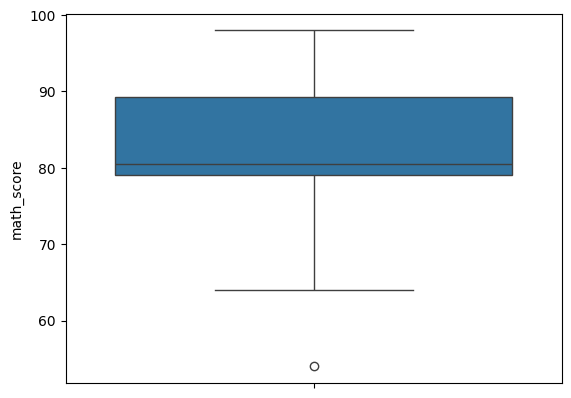

In [ ]:
#showing outliers using boxplot
sns.boxplot(df['math_score'])

<Axes: ylabel='english_score'>

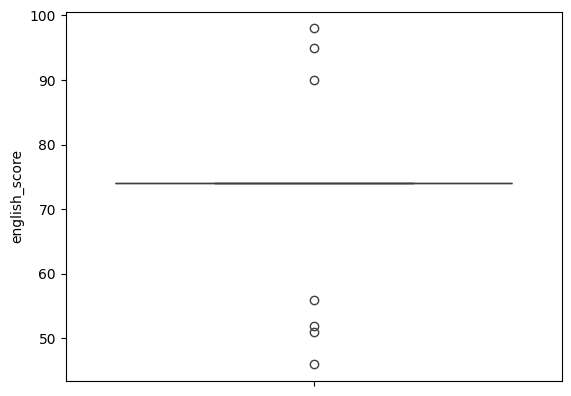

In [ ]:
sns.boxplot(df['english_score'])

<Axes: ylabel='physics_score'>

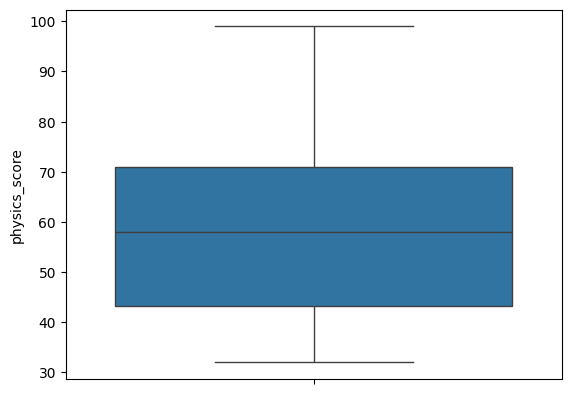

In [ ]:
sns.boxplot(df['physics_score'])

In [ ]:
#identifying the outliers
Q1 = df['english_score'].quantile(0.25)
Q3 = df['english_score'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 0.5*IQR
upper_limit = Q3 + 0.5*IQR

upper_array = np.where(df['english_score'] > upper_limit)[0]
lower_array = np.where(df['english_score'] < lower_limit)[0]

In [ ]:
#removing outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# printing new shape of dataset
print("new shape : ",df.shape)

new shape :  (13, 8)


<Axes: ylabel='english_score'>

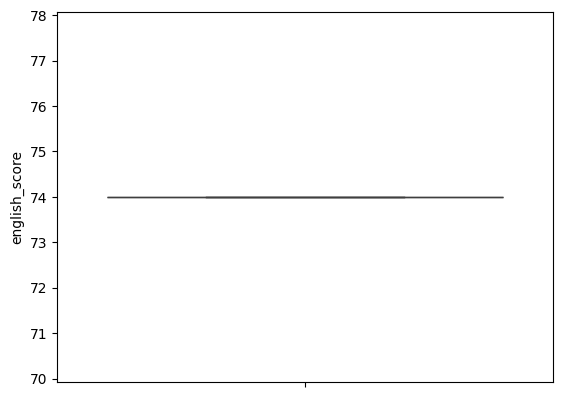

In [ ]:
sns.boxplot(df['english_score'])

In [ ]:
from scipy.stats import boxcox, skew, norm
# Calculate skewness
# Generating a skewed dataset
skewed_data = np.random.exponential(size=1000)

# Apply Box-Cox transformation
transformed_data, lambda_value = boxcox(skewed_data + 1)  # Adding 1 to handle zero values if present

# Calculate skewness before and after transformation
skewness_before = skew(skewed_data)
print("Skewness before transformation:", skewness_before)

skewness_after = skew(transformed_data)
print("Skewness after transformation:", skewness_after)


Skewness before transformation: 1.8995346760188703
Skewness after transformation: 0.11919948823757086


Text(0.5, 1.0, 'Skewed Distribution (Skewness: 1.90)')

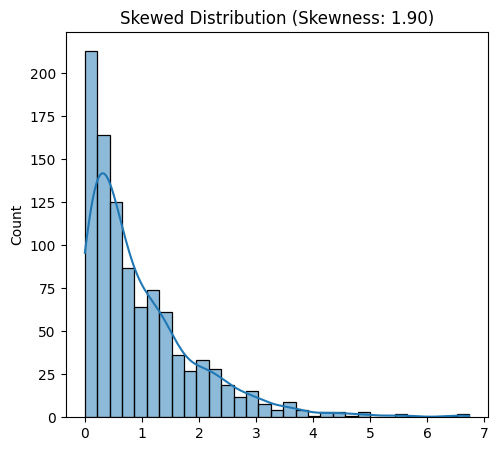

In [ ]:
import matplotlib.pyplot as plt

# Plotting original and transformed distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(skewed_data, kde=True)
plt.title(f'Skewed Distribution (Skewness: {skewness_before:.2f})')


Text(0.5, 1.0, 'Transformed Normal Distribution (Skewness: 0.12)')

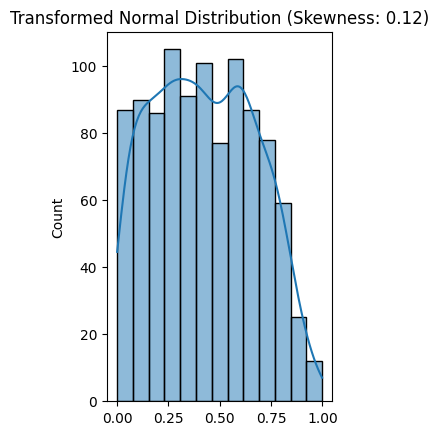

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True)
plt.title(f'Transformed Normal Distribution (Skewness: {skewness_after:.2f})')

In [ ]:
from scipy.stats import skew
original_skew = skew(df['math_score'])
transformed_data=np.sqrt(df['math_score'])
transformed_skew = skew(transformed_data)

NameError: name 'df' is not defined

In [ ]:
upper_array = np.where(df['math_score'] > upper_limit)[0]
df.drop(index=upper_limit,inplace=True)